导包  
pickle  
icon_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [1]:
import numpy as np

import pickle

icon_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [2]:
import matplotlib.pyplot as plt

加载训练数据  
Python引入了with语句来自动帮我们调用close()方法  
使用pickle.load(),encoding = 'ISO-8859-1'  
transpose([])方法调用

In [35]:
for i in range(1,6):
    
    with open('./data_batch_%d'%(i),mode='rb') as file:
        
        object_data  = pickle.load(file,encoding='ISO-8859-1')
        
        if i ==1:
            data = object_data['data'].reshape((10000,3,32,32)).transpose([0,2,3,1])
            labels = object_data['labels']
        else:
            data = np.concatenate([data,object_data['data'].reshape((10000,3,32,32)).transpose([0,2,3,1])])
            labels = np.concatenate([labels,object_data['labels']])

In [40]:
for i in range(1,2):
    
    with open('./test_batch',mode='rb') as file:
        
        object_data  = pickle.load(file,encoding='ISO-8859-1')
        
#         测试数据
        X_test = object_data['data'].reshape((10000,3,32,32)).transpose([0,2,3,1])
        y_test = object_data['labels']

In [41]:
X_test.shape

(10000, 32, 32, 3)

In [36]:
data.shape

(50000, 32, 32, 3)

In [37]:
labels.shape

(50000,)

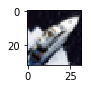

In [39]:
plt.figure(figsize=(1,1))

plt.imshow(data[20000])

In [34]:
a = np.array([1,2])
b = np.array([2,3])
np.concatenate([a,b])

array([1, 2, 2, 3])

In [15]:
data = object_data['data']
data.shape

(10000, 3072)

In [16]:
3072/3

1024.0

In [18]:
32*32

1024

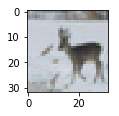

In [32]:
# 首先存储的是颜色
pic = data[20].reshape((3,32,32))
# plt.imshow(pic)
image = pic.transpose([1,2,0])
plt.figure(figsize=(1.5,1.5))
plt.imshow(image)

显示其中部分数据

加载预测数据

显示预测数据

使用np.concatenate()方法级联所有训练数据

使用支持向量机作为机器学习模型

In [43]:
from sklearn.svm import SVC

svc = SVC()

训练数据reshape

In [45]:
data = data.reshape((50000,-1))
data.shape

(50000, 3072)

使用PCA进行降维

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150,whiten=True,svd_solver='randomized')

In [59]:
data_pca = pca.fit_transform(data)

In [50]:
data_pca.shape

(50000, 150)

导入时间进行训练计时

In [51]:
import time

进行训练

In [60]:
print(time.time())

svc.fit(data_pca,labels)

print(time.time())

1522382328.6483896
1522383468.2407143


获取测试数据

In [61]:
X_test = X_test.reshape((10000,-1))

X_test_pca = pca.fit_transform(X_test)

取前100个数据作为预测数据

In [54]:
y_ = svc.predict(X_test_pca[::100])

展示测试结果

In [62]:
# matplotlib进行结果绘制
# y_ 和 y_test 比较这两个数据
# 10 行 10 列的数据，真实名称和预测名称显示

svc.score(X_test_pca[:100],y_test[:100])

0.29

In [63]:
svc.score(X_test_pca,y_test)

0.2191